<a href="https://colab.research.google.com/github/YusukeAoki57/diveintocode-ml/blob/master/week4_%E6%8E%88%E6%A5%AD%E8%AA%B2%E9%A1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

問題1コンペティション内容の把握

In [1]:
"""
何を学習し何を予測するのか：電話会社や取引情報などのさまざまな代替データを利用して、クライアントの返済能力を予測
どのようなファイルを作りkaggleに提出するか：testデータのIDと予測値（確率）を新規ファイルにて提出する
提出されたものはどういった指標値で評価されるのか：ROC
"""

'\n何を学習し何を予測するのか：電話会社や取引情報などのさまざまな代替データを利用して、クライアントの返済能力を予測\nどのようなファイルを作りkaggleに提出するか：testデータのIDと予測値（確率）を新規ファイルにて提出する\n提出されたものはどういった指標値で評価されるのか：ROC\n'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#pd.set_option('max_columns', None)
#pd.set_option('max_rows', None)

In [4]:
import numpy as np
import matplotlib.pyplot as plt

問題2&問題3 

In [49]:
#データセットの準備
import pandas as pd 
train= pd.read_csv('drive/My Drive/DIVE INTO CODE/0_課題/2_week3/授業課題/data/application_train.csv')
test=pd.read_csv('drive/My Drive/DIVE INTO CODE/0_課題/2_week3/授業課題/data/application_test.csv')
print(train.shape)
print(test.shape)

(307511, 122)
(48744, 121)


In [50]:
#欠損値の確認
def null_check(train,test):
    in_t=[]
    in_t2=[]
    total1=[]
    total2=[]
    missing_ratio1=[]
    missing_ratio2=[]
    for i in train.columns:
      if i=='TARGET':
        continue
      else:
        in_t.append(i)
        total1.append(train[i].isnull().sum())
        missing_ratio1.append(train[i].isnull().sum()/len(train)*100)
      
    for i in test.columns:
      in_t2.append(i)
      total2.append(test[i].isnull().sum())
      missing_ratio2.append(test[i].isnull().sum()/len(train)*100)
   
    matrix=np.array([total1,missing_ratio1,total2, missing_ratio2]).T
    col=['total_train','missing_ratio_train','total_test','missing_ratio_test']
    df = pd.DataFrame(matrix, columns=col, index=in_t)
    df1=df[df.total_train>0]
    return df1
df=null_check(train,test)
print(df)

                            total_train  ...  missing_ratio_test
AMT_ANNUITY                        12.0  ...            0.007805
AMT_GOODS_PRICE                   278.0  ...            0.000000
NAME_TYPE_SUITE                  1292.0  ...            0.296250
OWN_CAR_AGE                    202929.0  ...           10.507592
OCCUPATION_TYPE                 96391.0  ...            5.074615
...                                 ...  ...                 ...
AMT_REQ_CREDIT_BUREAU_DAY       41519.0  ...            1.967084
AMT_REQ_CREDIT_BUREAU_WEEK      41519.0  ...            1.967084
AMT_REQ_CREDIT_BUREAU_MON       41519.0  ...            1.967084
AMT_REQ_CREDIT_BUREAU_QRT       41519.0  ...            1.967084
AMT_REQ_CREDIT_BUREAU_YEAR      41519.0  ...            1.967084

[67 rows x 4 columns]


In [51]:
#欠損値削除(train目線での削除)：trainとtestで共通且つtrainで50,000以上欠損値があるカラムを削除

drop_index = df[df['total_train']>=40000].index.tolist()

train_new=train.drop(drop_index, axis=1)
test_new=test.drop(drop_index, axis=1)

print(train_new.shape)
train_new2=train_new.dropna(how='any',axis=0)
print(train_new2)
print(test_new)

(307511, 65)
        SK_ID_CURR  TARGET  ... FLAG_DOCUMENT_20 FLAG_DOCUMENT_21
0           100002       1  ...                0                0
1           100003       0  ...                0                0
2           100004       0  ...                0                0
3           100006       0  ...                0                0
4           100007       0  ...                0                0
...            ...     ...  ...              ...              ...
307506      456251       0  ...                0                0
307507      456252       0  ...                0                0
307508      456253       0  ...                0                0
307509      456254       1  ...                0                0
307510      456255       0  ...                0                0

[304531 rows x 65 columns]
       SK_ID_CURR NAME_CONTRACT_TYPE  ... FLAG_DOCUMENT_20 FLAG_DOCUMENT_21
0          100001         Cash loans  ...                0                0
1          1000

In [52]:
#欠損値削除(test目線での削除)：trainとtestで共通且つtrainで50,000以上欠損値があるカラムを削除

#欠損値の確認
def null_check(train,test):
    in_t=[]
    in_t2=[]
    total1=[]
    total2=[]
    missing_ratio1=[]
    missing_ratio2=[]
    for i in train.columns:
      if i=='TARGET':
        continue
      else:
        in_t.append(i)
        total1.append(train[i].isnull().sum())
        missing_ratio1.append(train[i].isnull().sum()/len(train)*100)
      
    for i in test.columns:
      in_t2.append(i)
      total2.append(test[i].isnull().sum())
      missing_ratio2.append(test[i].isnull().sum()/len(train)*100)
   
    matrix=np.array([total1,missing_ratio1,total2, missing_ratio2]).T
    col=['total_train','missing_ratio_train','total_test','missing_ratio_test']
    df = pd.DataFrame(matrix, columns=col, index=in_t)
    df1=df[df.total_test>0]
    return df1
df=null_check(train_new2,test_new)
print(df)



                          total_train  ...  missing_ratio_test
AMT_ANNUITY                       0.0  ...            0.007881
NAME_TYPE_SUITE                   0.0  ...            0.299149
EXT_SOURCE_2                      0.0  ...            0.002627
OBS_30_CNT_SOCIAL_CIRCLE          0.0  ...            0.009523
DEF_30_CNT_SOCIAL_CIRCLE          0.0  ...            0.009523
OBS_60_CNT_SOCIAL_CIRCLE          0.0  ...            0.009523
DEF_60_CNT_SOCIAL_CIRCLE          0.0  ...            0.009523

[7 rows x 4 columns]


In [53]:
#欠損値の削除（test目線）
drop_index = df[df['total_test']>=20].index.tolist()

train_new3=train_new2.drop(drop_index, axis=1)
test_new2=test_new.drop(drop_index, axis=1)
print(train_new3.shape)
print(test_new2.shape)

test_new3=test_new2.dropna(how='any',axis=0)

#欠損値の確認
df=null_check(train_new3,test_new3)
print(df)

(304531, 59)
(48744, 58)
Empty DataFrame
Columns: [total_train, missing_ratio_train, total_test, missing_ratio_test]
Index: []


In [54]:
#文字列を含むカラムの確認
train_new3.dtypes
print(train_new3.dtypes)
#u = train_new3['ORGANIZATION_TYPE'].unique()
print(u)
#文字列→数値型へ変換

#NAME_CONTRACT_TYPE
train_new3['NAME_CONTRACT_TYPE']=train_new3.loc[:,'NAME_CONTRACT_TYPE'].map({'Cash loans':1,'Revolving loans':2})
test_new3['NAME_CONTRACT_TYPE']=test_new3.loc[:,'NAME_CONTRACT_TYPE'].map({'Cash loans':1,'Revolving loans':2})
#print(train_new3.shape)

#CODE_GENDER
train_new3['CODE_GENDER']=train_new3.loc[:,'CODE_GENDER'].map({'F':1,'M':2,'XNA':3})
test_new3['CODE_GENDER']=test_new3.loc[:,'CODE_GENDER'].map({'F':1,'M':2,'XNA':3})
#print(train_new3.loc[:100,'CODE_GENDER'])

#FLAG_OWN_CAR
train_new3['FLAG_OWN_CAR']=train_new3.loc[:,'FLAG_OWN_CAR'].map({'N':1,'Y':2})
test_new3['FLAG_OWN_CAR']=test_new3.loc[:,'FLAG_OWN_CAR'].map({'N':1,'Y':2})
#print(train_new3.loc[:100,'FLAG_OWN_CAR'])

#FLAG_OWN_REALTY
train_new3['FLAG_OWN_REALTY']=train_new3.loc[:,'FLAG_OWN_REALTY'].map({'Y':1,'N':2})
test_new3['FLAG_OWN_REALTY']=test_new3.loc[:,'FLAG_OWN_REALTY'].map({'Y':1,'N':2})
#print(train_new3.loc[:100,'FLAG_OWN_REALTY'])

#NAME_INCOME_TYPE
train_new3['NAME_INCOME_TYPE']=train_new3.loc[:,'NAME_INCOME_TYPE'].map({'Working':1,'State servant':2,'Commercial associate':3,'Pensioner':4,'Unemployed':5,
                                                                         'Student':6,'Businessman':7,'Maternity leave':8})
test_new3['NAME_INCOME_TYPE']=test_new3.loc[:,'NAME_INCOME_TYPE'].map({'Working':1,'State servant':2,'Commercial associate':3,'Pensioner':4,'Unemployed':5,
                                                                         'Student':6,'Businessman':7,'Maternity leave':8})
#print(train_new3.loc[:100,'NAME_INCOME_TYPE'])

#NAME_EDUCATION_TYPE
train_new3['NAME_EDUCATION_TYPE']=train_new3.loc[:,'NAME_EDUCATION_TYPE'].map({'Secondary / secondary special':1,'Higher education':2,'Incomplete higher':3,
                                                                               'Lower secondary':4,'Academic degree':5})
test_new3['NAME_EDUCATION_TYPE']=test_new3.loc[:,'NAME_EDUCATION_TYPE'].map({'Secondary / secondary special':1,'Higher education':2,'Incomplete higher':3,
                                                                             'Lower secondary':4,'Academic degree':5})
#print(train_new3.loc[:100,'NAME_EDUCATION_TYPE'])

#NAME_FAMILY_STATUS
train_new3['NAME_FAMILY_STATUS']=train_new3.loc[:,'NAME_FAMILY_STATUS'].map({'Single / not married':1,'Married':2,'Civil marriage':3,'Widow':4,'Separated':5})
test_new3['NAME_FAMILY_STATUS']=test_new3.loc[:,'NAME_FAMILY_STATUS'].map({'Single / not married':1,'Married':2,'Civil marriage':3,'Widow':4,'Separated':5})
#print(train_new3.loc[:100,'NAME_FAMILY_STATUS'])


#NAME_HOUSING_TYPE
train_new3['NAME_HOUSING_TYPE']=train_new3.loc[:,'NAME_HOUSING_TYPE'].map({'House / apartment':1,'Rented apartment':2,'With parents':3,
                                                                             'Municipal apartment':4,'Office apartment':5,'Co-op apartment':6})
test_new3['NAME_HOUSING_TYPE']=test_new3.loc[:,'NAME_HOUSING_TYPE'].map({'House / apartment':1,'Rented apartment':2,'With parents':3,
                                                                             'Municipal apartment':4,'Office apartment':5,'Co-op apartment':6})
#print(train_new3.loc[:100,'NAME_HOUSING_TYPE'])

#WEEKDAY_APPR_PROCESS_START
train_new3=train_new3.drop('WEEKDAY_APPR_PROCESS_START', axis=1)
test_new3=test_new3.drop('WEEKDAY_APPR_PROCESS_START', axis=1)

#'ORGANIZATION_TYPE'
train_new3=train_new3.drop('ORGANIZATION_TYPE', axis=1)
test_new3=test_new3.drop('ORGANIZATION_TYPE', axis=1)


SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_GOODS_PRICE                float64
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE                       int64
FLAG_EMAIL                       int64
CNT_FAM_MEMBERS          

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [55]:
train_new3.dtypes
print(train_new3.dtypes)


SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE               int64
CODE_GENDER                      int64
FLAG_OWN_CAR                     int64
FLAG_OWN_REALTY                  int64
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_GOODS_PRICE                float64
NAME_INCOME_TYPE                 int64
NAME_EDUCATION_TYPE              int64
NAME_FAMILY_STATUS               int64
NAME_HOUSING_TYPE                int64
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE                       int64
FLAG_EMAIL                       int64
CNT_FAM_MEMBERS          

                               corr_y
TARGET                       1.000000
CODE_GENDER                  0.055210
NAME_INCOME_TYPE            -0.057163
DAYS_BIRTH                   0.078636
REGION_RATING_CLIENT         0.058904
REGION_RATING_CLIENT_W_CITY  0.060900
EXT_SOURCE_2                -0.160819
DAYS_LAST_PHONE_CHANGE       0.055887


'\nEXIT_SORCE_2、DAYS_BIRTH、REGION_RATING_CLIENT_W_CITYでまずは推定\n\n'

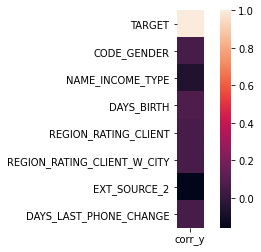

In [136]:
#相関係数
import seaborn as sns
#相関行列の作成
cor=train_new3.corr()
corr_y = pd.DataFrame({"corr_y":cor['TARGET']},index=None) #corでは文字列の列は削除されている
#print(corr_y)

#±0.5以上の特徴量を抽出→10個
select_cols = corr_y[corr_y["corr_y"].abs()>0.055]
print(select_cols)

#相関が±0.5以上のヒートマップ
sns.heatmap(select_cols,
            square=True,
            xticklabels=select_cols.columns.values,
            yticklabels=select_cols.index.values)

"""
EXIT_SORCE_2、DAYS_BIRTH、REGION_RATING_CLIENT_W_CITYでまずは推定

"""

In [93]:
#説明変数をEXIT_SORCE_2として推定

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


#訓練データとテストデータに分割

x_train, x_test, y_train, y_test = train_test_split(train_new3.loc[:,'EXT_SOURCE_2'], train_new3.loc[:, "TARGET"], test_size=0.05, random_state=42)

ntest_y=y_test.shape[0]
x_test2=test_new3.loc[:ntest_y+1,'EXT_SOURCE_2']
print(x_test2.shape)
print(y_test.shape)

#np化
x_train1=np.array(x_train).reshape(-1,1)
y_train1=np.array(y_train)
x_test1=np.array(x_test2).reshape(-1,1)
y_test1=np.array(y_test)

def Linear(x_train,x_test,y_train):
  lg = LogisticRegression(random_state=0, class_weight='balanced', C=500)
  lg.fit(x_train, y_train)
  lg.fit(x_train, y_train)
  y_pred = lg.predict_proba(x_test)[:,1]
  return y_pred

y_pred1=Linear(x_train1,x_test1,y_train1)


(15227,)
(15227,)


In [94]:
#評価
from sklearn.metrics import roc_auc_score
print("ROC",  roc_auc_score(y_test1,y_pred1))

ROC 0.5107155012098298


問題4 特徴量エンジニアリング

In [134]:
#EXT_SOURCE_2とDAYS_BIRTHの組み合わせ

x1=pd.concat([train_new3.loc[:,'EXT_SOURCE_2'],train_new3.loc[:,'CODE_GENDER'],],axis=1)
#print(x1.shape)

x_train1, x_test1, y_train1, y_test1 = train_test_split(x1,train_new3.loc[:, "TARGET"], test_size=0.05, random_state=42)


ntest_y=y_test1.shape[0]
x_test3=pd.concat([test_new3.loc[:,'EXT_SOURCE_2'],test_new3.loc[:,'DAYS_BIRTH']],axis=1)
x_test4=x_test3.iloc[:ntest_y,0:]
#print(x_test4.shape)
#print(y_test1.shape)

#np化
x_train3=np.array(x_train1)
y_train3=np.array(y_train1)
print(x_train3.shape)
print(y_train3.shape)
x_test5=np.array(x_test4)
y_test4=np.array(y_test1)

def Linear(x_train,x_test,y_train):
  lg = LogisticRegression(random_state=0, class_weight='balanced', C=500)
  lg.fit(x_train, y_train)
  lg.fit(x_train, y_train)
  y_pred = lg.predict_proba(x_test)[:,1]
  return y_pred

y_pred2=Linear(x_train3,x_test5,y_train3)
print(y_pred2.shape)
print(y_test4.shape)

(289304, 2)
(289304,)
(15227,)
(15227,)


In [135]:
#評価1
from sklearn.metrics import roc_auc_score
print("ROC",  roc_auc_score(y_test4,y_pred2))

ROC 0.49024014785978676


In [138]:
#相関係数0.55以上の組み合わせ
"""
CODE_GENDER                  0.055210
NAME_INCOME_TYPE            -0.057163
DAYS_BIRTH                   0.078636
REGION_RATING_CLIENT         0.058904
REGION_RATING_CLIENT_W_CITY  0.060900
EXT_SOURCE_2                -0.160819
DAYS_LAST_PHONE_CHANGE       0.055887
"""

x2=pd.concat([train_new3.loc[:,'EXT_SOURCE_2'],train_new3.loc[:,'DAYS_BIRTH'],train_new3.loc[:,'CODE_GENDER'],train_new3.loc[:,'REGION_RATING_CLIENT'],train_new3.loc[:,'REGION_RATING_CLIENT_W_CITY'],
             train_new3.loc[:,'DAYS_LAST_PHONE_CHANGE']],axis=1)
#print(x1.shape)

x_train10, x_test10, y_train10, y_test10 = train_test_split(x2,train_new3.loc[:, "TARGET"], test_size=0.05, random_state=42)


ntest_y=y_test10.shape[0]
x_test11=pd.concat([test_new3.loc[:,'EXT_SOURCE_2'],test_new3.loc[:,'DAYS_BIRTH'],test_new3.loc[:,'CODE_GENDER'],test_new3.loc[:,'REGION_RATING_CLIENT'],test_new3.loc[:,'REGION_RATING_CLIENT_W_CITY'],
             test_new3.loc[:,'DAYS_LAST_PHONE_CHANGE']],axis=1)
x_test12=x_test11.iloc[:ntest_y,0:]
#print(x_test4.shape)
#print(y_test1.shape)

#np化
x_train13=np.array(x_train10)
y_train13=np.array(y_train10)
print(x_train13.shape)
print(y_train13.shape)
x_test13=np.array(x_test12)
y_test13=np.array(y_test10)

def Linear(x_train,x_test,y_train):
  lg = LogisticRegression(random_state=0, class_weight='balanced', C=500)
  lg.fit(x_train, y_train)
  lg.fit(x_train, y_train)
  y_pred = lg.predict_proba(x_test)[:,1]
  return y_pred

y_pred3=Linear(x_train13,x_test13,y_train13)
print(y_pred3.shape)
print(y_test13.shape)

(289304, 6)
(289304,)
(15227,)
(15227,)


In [139]:
#評価2
from sklearn.metrics import roc_auc_score
print("ROC",  roc_auc_score(y_test13,y_pred3))

ROC 0.5091101068180067


In [142]:
#相関係数がマイナスのものだけ
#EXT_SOURCE_2とNAME_INCOME_TYPEの組み合わせ

x3=pd.concat([train_new3.loc[:,'EXT_SOURCE_2'],train_new3.loc[:,'NAME_INCOME_TYPE'],],axis=1)
#print(x1.shape)

x_train20, x_test20, y_train20, y_test20 = train_test_split(x3,train_new3.loc[:, "TARGET"], test_size=0.05, random_state=42)


ntest_y=y_test20.shape[0]
x_test21=pd.concat([test_new3.loc[:,'EXT_SOURCE_2'],test_new3.loc[:,'NAME_INCOME_TYPE']],axis=1)
x_test22=x_test21.iloc[:ntest_y,0:]
#print(x_test4.shape)
#print(y_test1.shape)

#np化
x_train23=np.array(x_train20)
y_train23=np.array(y_train20)
print(x_train3.shape)
print(y_train3.shape)
x_test23=np.array(x_test22)
y_test23=np.array(y_test20)

def Linear(x_train,x_test,y_train):
  lg = LogisticRegression(random_state=0, class_weight='balanced', C=500)
  lg.fit(x_train, y_train)
  lg.fit(x_train, y_train)
  y_pred = lg.predict_proba(x_test)[:,1]
  return y_pred

y_pred4=Linear(x_train23,x_test23,y_train23)
print(y_pred4.shape)
print(y_test23.shape)

(289304, 2)
(289304,)
(15227,)
(15227,)


In [143]:
#評価3
from sklearn.metrics import roc_auc_score
print("ROC",  roc_auc_score(y_test23,y_pred4))

ROC 0.505233188542471


In [147]:
#相関係数が0.06以上のものだけ

"""
DAYS_BIRTH                   0.078636
REGION_RATING_CLIENT_W_CITY  0.060900
EXT_SOURCE_2                -0.160819
"""


x5=pd.concat([train_new3.loc[:,'EXT_SOURCE_2'],train_new3.loc[:,'DAYS_BIRTH'],train_new3.loc[:,'REGION_RATING_CLIENT']],axis=1)
#print(x1.shape)

x_train30, x_test30, y_train30, y_test30 = train_test_split(x5,train_new3.loc[:, "TARGET"], test_size=0.05, random_state=42)


ntest_y=y_test30.shape[0]
x_test31=pd.concat([test_new3.loc[:,'EXT_SOURCE_2'],test_new3.loc[:,'DAYS_BIRTH'],test_new3.loc[:,'REGION_RATING_CLIENT']],axis=1)
x_test32=x_test31.iloc[:ntest_y,0:]
#print(x_test4.shape)
#print(y_test1.shape)

#np化
x_train33=np.array(x_train30)
y_train33=np.array(y_train30)
print(x_train33.shape)
print(y_train33.shape)
x_test33=np.array(x_test32)
y_test33=np.array(y_test30)

def Linear(x_train,x_test,y_train):
  lg = LogisticRegression(random_state=0, class_weight='balanced', C=500)
  lg.fit(x_train, y_train)
  lg.fit(x_train, y_train)
  y_pred = lg.predict_proba(x_test)[:,1]
  return y_pred

y_pred5=Linear(x_train33,x_test33,y_train33)
print(y_pred5.shape)
print(y_test33.shape)

(289304, 3)
(289304,)
(15227,)
(15227,)


In [148]:
#評価4
from sklearn.metrics import roc_auc_score
print("ROC",  roc_auc_score(y_test33,y_pred5))

ROC 0.49024082582542877


                               corr_y
REGION_POPULATION_RELATIVE   0.198651
REGION_RATING_CLIENT        -0.292444
REGION_RATING_CLIENT_W_CITY -0.287918
EXT_SOURCE_2                 1.000000
DAYS_LAST_PHONE_CHANGE      -0.196644


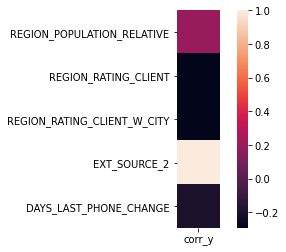

In [154]:
#EXT_SORCE_2と相関が強い特徴量の抽出
#相関行列の作成
cor=train_new3.corr()
corr_y = pd.DataFrame({"corr_y":cor['EXT_SOURCE_2']},index=None) #corでは文字列の列は削除されている
#print(corr_y)

#±0.5以上の特徴量を抽出→10個
select_cols = corr_y[corr_y["corr_y"].abs()>0.19]
print(select_cols)

#相関が±0.5以上のヒートマップ
sns.heatmap(select_cols,
            square=True,
            xticklabels=select_cols.columns.values,
            yticklabels=select_cols.index.values)


In [158]:
#EXT_SOURCE_2と相関が0.19以上のもの且つTARGETと相関が強いもので推定・評価

x10=pd.concat([train_new3.loc[:,'EXT_SOURCE_2'],train_new3.loc[:,'REGION_RATING_CLIENT'],train_new3.loc[:,'REGION_RATING_CLIENT_W_CITY'],
             train_new3.loc[:,'DAYS_LAST_PHONE_CHANGE']],axis=1)
#print(x1.shape)

x_train40, x_test40, y_train40, y_test40 = train_test_split(x10,train_new3.loc[:, "TARGET"], test_size=0.05, random_state=42)


ntest_y=y_test40.shape[0]
x_test41=pd.concat([test_new3.loc[:,'EXT_SOURCE_2'],test_new3.loc[:,'REGION_RATING_CLIENT'],test_new3.loc[:,'REGION_RATING_CLIENT_W_CITY'],
             test_new3.loc[:,'DAYS_LAST_PHONE_CHANGE']],axis=1)
x_test42=x_test41.iloc[:ntest_y,0:]
#print(x_test4.shape)
#print(y_test1.shape)

#np化
x_train43=np.array(x_train40)
y_train43=np.array(y_train40)
print(x_train43.shape)
print(y_train43.shape)
x_test43=np.array(x_test42)
y_test43=np.array(y_test40)

def Linear(x_train,x_test,y_train):
  lg = LogisticRegression(random_state=0, class_weight='balanced', C=500)
  lg.fit(x_train, y_train)
  lg.fit(x_train, y_train)
  y_pred = lg.predict_proba(x_test)[:,1]
  return y_pred

y_pred20=Linear(x_train43,x_test43,y_train43)
print(y_pred3.shape)
print(y_test13.shape)

(289304, 4)
(289304,)
(15227,)
(15227,)


In [159]:
#評価4
from sklearn.metrics import roc_auc_score
print("ROC",  roc_auc_score(y_test43,y_pred20))

ROC 0.512294087710223


考察　EXT_SOURCE_2と相関があり、且つTARGETとも相関があるものが最も数値が良いが、そもそも欠損値の削除を最初にしてしまったため、欠損値の中にTARGETと相関が強いものが他にもあったかもしれない。従い、手順としてまずは相関係数を調査、相関が高いものを前処理することを今後実施することとする

In [160]:
#提出ファイルの作成

In [168]:
out_df=pd.DataFrame({'SK_ID_CURR':test_new3.loc[:ntest_y+1,'SK_ID_CURR'],'TARGET':y_pred20})
out_df.to_csv('submission.csv',index=False)